In [44]:
import wget

In [45]:
#url = "https://lazyprogrammer.me/course_files/AirlineTweets.csv"
#wget.download(url,"twitter-airline-sentiment.csv")

In [46]:


import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [47]:
np.random.seed(0)
tf.random.set_seed(0)

In [48]:
df = pd.read_csv('data/twitter-airline-sentiment.csv')

In [49]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: >

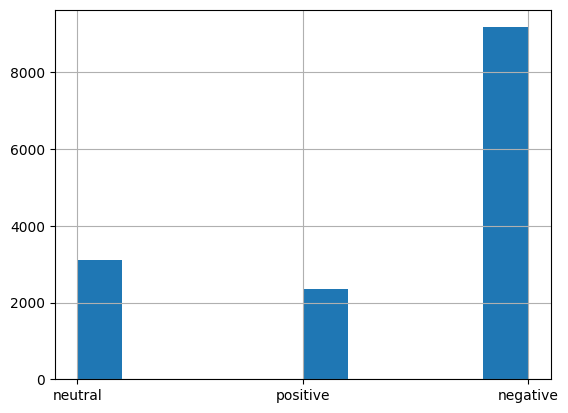

In [50]:
df  =df[['airline_sentiment','text']]
df['airline_sentiment'].hist()

In [51]:
df = df[df['airline_sentiment'] != 'neutral'].copy()

In [52]:
target_map = {'positive': 1, 'negative': 0}
df['target']  =df['airline_sentiment'].map(target_map)
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [53]:
df_train , df_test = train_test_split(df, test_size=0.2, random_state=0)

In [54]:
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])
Y_train = df_train['target']
Y_test = df_test['target']

In [55]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((9232, 2000), (9232,), (2309, 2000), (2309,))

In [56]:
D =X_train.shape[1]

In [57]:
i = Input(shape=(D,))
x = Dense(1)(i)

model = Model(i , x)

In [58]:
x.ndim

2

In [59]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         2,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
model.compile(
    loss = BinaryCrossentropy(from_logits=True),
    optimizer = Adam(learning_rate=0.01),
    metrics = ['accuracy']
)

In [61]:
r = model.fit(
  X_train, Y_train,
  validation_data=(X_test, Y_test),
  epochs=40,
  batch_size=128,
)

Epoch 1/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7890 - loss: 0.5668 - val_accuracy: 0.7964 - val_loss: 0.3955
Epoch 2/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7918 - loss: 0.3877 - val_accuracy: 0.8129 - val_loss: 0.3364
Epoch 3/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8144 - loss: 0.3298 - val_accuracy: 0.8385 - val_loss: 0.2982
Epoch 4/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8402 - loss: 0.2901 - val_accuracy: 0.8631 - val_loss: 0.2722
Epoch 5/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8600 - loss: 0.2617 - val_accuracy: 0.8766 - val_loss: 0.2536
Epoch 6/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8791 - loss: 0.2403 - val_accuracy: 0.8917 - val_loss: 0.2398
Epoch 7/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8911 - loss: 0.2236 - val_accuracy: 0.8991 - val_loss: 0.2292
Epoch 8/40
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8984 - loss: 0.2102 - val_accuracy: 0.9026 - val_loss:

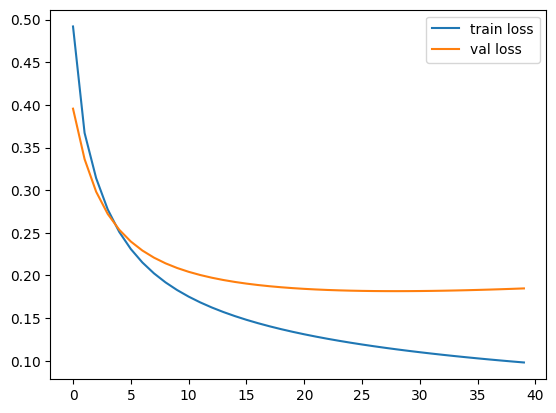

In [62]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()

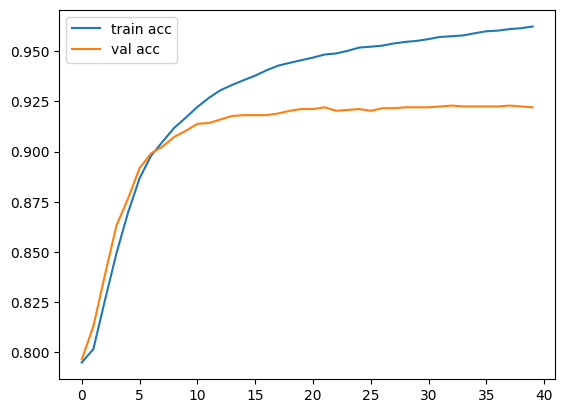

In [63]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

In [64]:
model.predict(X_train).shape

289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step


(9232, 1)

In [65]:
P_train = ((model.predict(X_train) > 0) * 1.0).flatten()
P_test = ((model.predict(X_test) > 0) * 1.0).flatten()

289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 656us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step


In [66]:
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

array([[0.98828178, 0.01171822],
       [0.10195457, 0.89804543]])

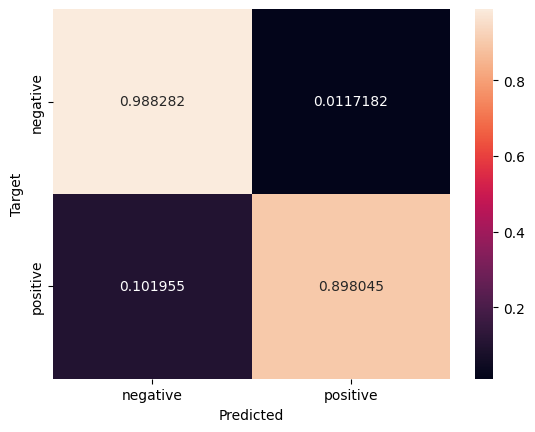

In [67]:
# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sns.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)

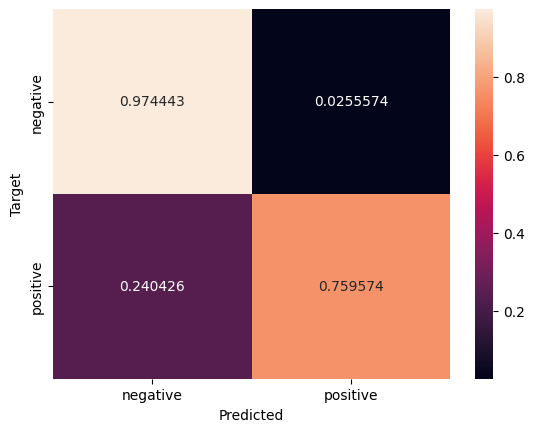

In [68]:
cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

In [69]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

289/289 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 890us/step
Train AUC: 0.9935492146358307
Test AUC: 0.9621498733122766


In [70]:
print("Train F1:", f1_score(Y_train, P_train))
print("Test F1:", f1_score(Y_test, P_test))

Train F1: 0.9241641750475673
Test F1: 0.816933638443936


In [71]:
model.layers[1].get_weights()

[array([[-4.147718 ],
        [ 3.0382614],
        [-3.4156446],
        ...,
        [-4.033657 ],
        [-0.6504935],
        [-6.0587454]], dtype=float32),
 array([-0.2740847], dtype=float32)]

In [86]:
model.layers[1].get_weights()[1].shape

(1,)

In [72]:
w = model.layers[1].get_weights()[0]

In [73]:
word_index_map = vectorizer.vocabulary_
word_index_map

{'usairways': 1865,
 'three': 1748,
 'hour': 905,
 'flight': 733,
 'delay': 507,
 'on': 1249,
 'the': 1730,
 'phone': 1324,
 'for': 762,
 'and': 143,
 'counting': 453,
 'americanair': 138,
 'please': 1345,
 'do': 571,
 'something': 1616,
 'about': 76,
 'boarding': 262,
 'at': 190,
 'dca': 495,
 'many': 1102,
 'delays': 510,
 'to': 1764,
 'planes': 1339,
 'tarmac': 1709,
 'despite': 531,
 'empty': 621,
 'gates': 803,
 'mess': 1129,
 'united': 1844,
 'you': 1994,
 'left': 1025,
 'my': 1186,
 'bag': 216,
 'in': 937,
 'houston': 908,
 'last': 1015,
 'night': 1207,
 'it': 972,
 'freezing': 776,
 'cold': 387,
 'memphis': 1125,
 'any': 154,
 'idea': 925,
 'when': 1933,
 'will': 1945,
 'see': 1536,
 'off': 1235,
 'again': 106,
 'tomorrow': 1769,
 'thank': 1724,
 'wonderful': 1957,
 'global': 816,
 'first': 724,
 'class': 368,
 'your': 1996,
 '777': 67,
 'great': 828,
 'service': 1550,
 'cont': 433,
 'http': 913,
 'co': 382,
 'jetblue': 981,
 'is': 966,
 'so': 1607,
 'today': 1765,
 'southwesta

In [102]:
# let's look at the weights for each word
# try it with different threshold values!
threshold = 5

print("Most positive words:")
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index, 0]
    if weight > threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])
for i in range(10):
  word, weight = word_weight_tuples[i]
  print(word, weight)

Most positive words:
thank 9.953316
thanks 9.782922
worries 8.214743
great 7.463387
love 7.333333
awesome 7.1589866
amazing 7.002546
wonderful 6.5618463
excellent 6.419103
kudos 6.3906317


In [103]:
print("Most negative words:")
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index, 0]
    if weight < -threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: x[1])
for i in range(10):
  word, weight = word_weight_tuples[i]
  print(word, weight)

Most negative words:
worst -9.694785
paid -8.041878
rude -7.83511
not -7.5176373
disappointed -7.4262877
hung -6.990322
broken -6.892406
nothing -6.4819117
error -6.4495964
poor -6.4241424


In [105]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 2000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         2,001 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,005 (23.46 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,004 (15.64 KB)